In [1]:
# Mount the google drive
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

# cd only once to the wanted dir at the beginning
%cd '/content/drive/MyDrive/Grad School/ECE219/HW2'

Mounted at /content/drive
/content/drive/MyDrive/Grad School/ECE219/HW2


# Helper Code

In [10]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
def plot_mat(mat, xticklabels = None, yticklabels = None, pic_fname = None, size=(-1,-1), if_show_values = True,
             colorbar = True, grid = 'k', xlabel = None, ylabel = None, title = None, vmin=None, vmax=None):
    if size == (-1, -1):
        size = (mat.shape[1] / 3, mat.shape[0] / 3)

    fig = plt.figure(figsize=size)
    ax = fig.add_subplot(1,1,1)

    # im = ax.imshow(mat, cmap=plt.cm.Blues)
    im = ax.pcolor(mat, cmap=plt.cm.Blues, linestyle='-', linewidth=0.5, edgecolor=grid, vmin=vmin, vmax=vmax)
    
    if colorbar:
        plt.colorbar(im,fraction=0.046, pad=0.06)
    # tick_marks = np.arange(len(classes))
    # Ticks
    lda_num_topics = mat.shape[0]
    nmf_num_topics = mat.shape[1]
    yticks = np.arange(lda_num_topics)
    xticks = np.arange(nmf_num_topics)
    ax.set_xticks(xticks + 0.5)
    ax.set_yticks(yticks + 0.5)
    if xticklabels is None:
        xticklabels = [str(i) for i in xticks]
    if yticklabels is None:
        yticklabels = [str(i) for i in yticks]
    ax.set_xticklabels(xticklabels)
    ax.set_yticklabels(yticklabels)

    # Minor ticks
    # ax.set_xticks(xticks, minor=True);
    # ax.set_yticks(yticks, minor=True);
    # ax.set_xticklabels([], minor=True)
    # ax.set_yticklabels([], minor=True)

    # ax.grid(which='minor', color='k', linestyle='-', linewidth=0.5)

    # tick labels on all four sides
    ax.tick_params(labelright = True, labeltop = False)

    if ylabel:
        plt.ylabel(ylabel, fontsize=15)
    if xlabel:
        plt.xlabel(xlabel, fontsize=15)
    if title:
        plt.title(title, fontsize=15)

    # im = ax.imshow(mat, interpolation='nearest', cmap=plt.cm.Blues)
    ax.invert_yaxis()

    # thresh = mat.max() / 2

    def show_values(pc, fmt="%.3f", **kw):
        pc.update_scalarmappable()
        ax = pc.axes
        for p, color, value in itertools.zip_longest(pc.get_paths(), pc.get_facecolors(), pc.get_array()):
            x, y = p.vertices[:-2, :].mean(0)
            if np.all(color[:3] > 0.5):
                color = (0.0, 0.0, 0.0)
            else:
                color = (1.0, 1.0, 1.0)
            ax.text(x, y, fmt % value, ha="center", va="center", color=color, **kw, fontsize=10)

    if if_show_values:
        show_values(im)
    # for i, j in itertools.product(range(mat.shape[0]), range(mat.shape[1])):
    #     ax.text(j, i, "{:.2f}".format(mat[i, j]), fontsize = 4,
    #              horizontalalignment="center",
    #              color="white" if mat[i, j] > thresh else "black")

    plt.tight_layout()
    if pic_fname:
        plt.savefig(pic_fname, dpi=300, transparent=True)
    plt.show()
    plt.close()

# Question 1

In [11]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer

categories = ['comp.graphics', 'comp.os.ms-windows.misc', 'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware',
              'rec.autos', 'rec.motorcycles', 'rec.sport.baseball', 'rec.sport.hockey']
raw_train = fetch_20newsgroups(subset='train', categories=categories)
raw_test = fetch_20newsgroups(subset='test', categories=categories)

vectorizer = TfidfVectorizer(min_df=3, stop_words='english')
vectorized_train = vectorizer.fit_transform(raw_train.data)
vectorized_test = vectorizer.transform(raw_test.data)
print(vectorized_train.shape)
print(vectorized_test.shape)

(4732, 20297)
(3150, 20297)


# Question 2

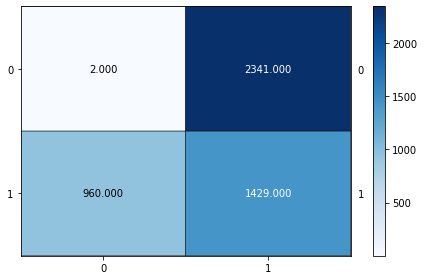

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics.cluster import contingency_matrix

kmeans = KMeans(n_clusters=2, random_state=0, max_iter=1000, n_init=30).fit(vectorized_train)

preds = kmeans.labels_
gt_labels = [0 if x < 4 else 1 for x in raw_train.target]
contingency = contingency_matrix(gt_labels, preds)
plot_mat(contingency,size=(6,4))

# Question 3

In [13]:
from sklearn import metrics

def report(preds, labels):
  homog = metrics.homogeneity_score(labels, preds)
  compl = metrics.completeness_score(labels, preds)
  vmeas = metrics.v_measure_score(labels, preds)
  ari = metrics.adjusted_rand_score(labels, preds)
  ami = metrics.adjusted_mutual_info_score(labels, preds)

  print(f"Homogeneity: {homog}")
  print(f"Completeness: {compl}")
  print(f"V-Measure: {vmeas}")
  print(f"Adjusted Rand Index: {ari}")
  print(f"Adjusted Mutual Info: {ami}")

report(preds, gt_labels)

NameError: ignored

# Question 4

In [ ]:
from sklearn.decomposition import TruncatedSVD
import matplotlib.pyplot as plt
import numpy as np

svd = TruncatedSVD(n_components=1000).fit(vectorized_train)

Text(0, 0.5, '% Explained Variance')

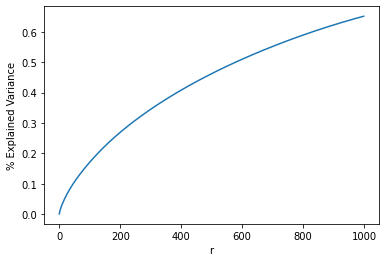

In [ ]:
plt.plot(np.arange(1000), np.cumsum(svd.explained_variance_ratio_))
plt.xlabel("r")
plt.ylabel("% Explained Variance")

# Question 5

## SVD

In [ ]:
reduced = TruncatedSVD(n_components=1000).fit_transform(vectorized_train)
print(reduced.shape)

(4732, 1000)


In [ ]:
for k in [1,2,3,4,5,6,7,8,9,10,20,50,100,300]:
  kmeans = KMeans(n_clusters=2, random_state=0, max_iter=1000, n_init=30).fit(reduced[...,:k])
  print(f"Report for K={k}")
  report(gt_labels, kmeans.labels_)
  print()

Report for K=1
Homogeneity: 0.00014204095083062465
Completeness: 0.0001412576842723577
V-Measure: 0.0001416482347603562
Adjusted Rand Index: 8.382911369078102e-06
Adjusted Mutual Info: -1.1274670412013187e-05

Report for K=2
Homogeneity: 0.5424402796383101
Completeness: 0.5305509173713137
V-Measure: 0.5364297280039588
Adjusted Rand Index: 0.5935838393168896
Adjusted Mutual Info: 0.5363582386800763

Report for K=3
Homogeneity: 0.3429682249124538
Completeness: 0.2678130620246852
V-Measure: 0.3007668127868771
Adjusted Rand Index: 0.20171201240583206
Adjusted Mutual Info: 0.30064701849422476

Report for K=4
Homogeneity: 0.3190720623461098
Completeness: 0.23521365043596762
V-Measure: 0.27079934700055236
Adjusted Rand Index: 0.16175539632640745
Adjusted Mutual Info: 0.2706712700527146

Report for K=5
Homogeneity: 0.31385241663380814
Completeness: 0.22520780430242976
V-Measure: 0.2622416230318425
Adjusted Rand Index: 0.14746025949392344
Adjusted Mutual Info: 0.2621105593274784

Report for K=6

## NMF

In [ ]:
from sklearn.decomposition import NMF
for k in [1,2,3,4,5,6,7,8,9,10,20,50,100,300]:
  reduced = NMF(n_components=k).fit_transform(vectorized_train)
  kmeans = KMeans(n_clusters=2, random_state=0, max_iter=1000, n_init=30).fit(reduced[...,:k])
  print(f"Report for K={k}")
  report(gt_labels, kmeans.labels_)
  print()

/usr/local/lib/python3.8/dist-packages/sklearn/decomposition/_nmf.py:289: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(


Report for K=1
Homogeneity: 0.00014204095083062465
Completeness: 0.0001412576842723577
V-Measure: 0.0001416482347603562
Adjusted Rand Index: 8.382911369078102e-06
Adjusted Mutual Info: -1.1274670412013187e-05



/usr/local/lib/python3.8/dist-packages/sklearn/decomposition/_nmf.py:289: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(


Report for K=2
Homogeneity: 0.6905260883022852
Completeness: 0.690571739184181
V-Measure: 0.6905489129887598
Adjusted Rand Index: 0.7899955869859687
Adjusted Mutual Info: 0.6905017163557045



/usr/local/lib/python3.8/dist-packages/sklearn/decomposition/_nmf.py:289: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(


Report for K=3
Homogeneity: 0.3196504076011302
Completeness: 0.23113119484736752
V-Measure: 0.2682775906597415
Adjusted Rand Index: 0.15237204725648834
Adjusted Mutual Info: 0.268148016305106



/usr/local/lib/python3.8/dist-packages/sklearn/decomposition/_nmf.py:289: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(


Report for K=4
Homogeneity: 0.3162330803831179
Completeness: 0.229987229396009
V-Measure: 0.2663012293705742
Adjusted Rand Index: 0.1543590393168567
Adjusted Mutual Info: 0.2661716214087818



/usr/local/lib/python3.8/dist-packages/sklearn/decomposition/_nmf.py:289: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(


Report for K=5
Homogeneity: 0.2760431861741438
Completeness: 0.17523153437355513
V-Measure: 0.21437704734691596
Adjusted Rand Index: 0.09531407102134519
Adjusted Mutual Info: 0.2142303959344148



/usr/local/lib/python3.8/dist-packages/sklearn/decomposition/_nmf.py:289: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(


Report for K=6
Homogeneity: 0.28085367702643715
Completeness: 0.17941597027058603
V-Measure: 0.21895701905905762
Adjusted Rand Index: 0.09794353280200618
Adjusted Mutual Info: 0.21881158179903723



/usr/local/lib/python3.8/dist-packages/sklearn/decomposition/_nmf.py:289: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(


Report for K=7
Homogeneity: 0.2754110347712848
Completeness: 0.1763527330022108
V-Measure: 0.215021620349309
Adjusted Rand Index: 0.09767874948960878
Adjusted Mutual Info: 0.2148755845050072



/usr/local/lib/python3.8/dist-packages/sklearn/decomposition/_nmf.py:289: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(


Report for K=8
Homogeneity: 0.2781082093475005
Completeness: 0.1779407006473716
V-Measure: 0.2170239574857731
Adjusted Rand Index: 0.09794341234795831
Adjusted Mutual Info: 0.21687824959536192



/usr/local/lib/python3.8/dist-packages/sklearn/decomposition/_nmf.py:289: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(


Report for K=9
Homogeneity: 0.27914286345779193
Completeness: 0.17929947728288523
V-Measure: 0.21834880881363145
Adjusted Rand Index: 0.09927148561118791
Adjusted Mutual Info: 0.21820356918686284



/usr/local/lib/python3.8/dist-packages/sklearn/decomposition/_nmf.py:289: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(


Report for K=10
Homogeneity: 0.2704943529461418
Completeness: 0.16797199840720142
V-Measure: 0.20724726940613786
Adjusted Rand Index: 0.08839337179548339
Adjusted Mutual Info: 0.2070980220402393



/usr/local/lib/python3.8/dist-packages/sklearn/decomposition/_nmf.py:289: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(


Report for K=20
Homogeneity: 0.028338076473557707
Completeness: 0.002034895712755213
V-Measure: 0.0037971279182060255
Adjusted Rand Index: -9.852324619533212e-05
Adjusted Mutual Info: 0.0035100753973753753



/usr/local/lib/python3.8/dist-packages/sklearn/decomposition/_nmf.py:289: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(


Report for K=50
Homogeneity: 0.09834453089817194
Completeness: 0.002146491979352881
V-Measure: 0.0042012856619724976
Adjusted Rand Index: 9.906029065382073e-05
Adjusted Mutual Info: 0.003886069357709056



/usr/local/lib/python3.8/dist-packages/sklearn/decomposition/_nmf.py:289: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(


Report for K=100
Homogeneity: 0.09834453089817194
Completeness: 0.002146491979352881
V-Measure: 0.0042012856619724976
Adjusted Rand Index: 9.906029065382073e-05
Adjusted Mutual Info: 0.003886069357709056



/usr/local/lib/python3.8/dist-packages/sklearn/decomposition/_nmf.py:289: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(


Report for K=300
Homogeneity: 0.008867264974528067
Completeness: 0.0011622433966206522
V-Measure: 0.0020551197090332486
Adjusted Rand Index: -0.00010124188569221305
Adjusted Mutual Info: 0.0017844422841272712



# Question 8

## PCA

Text(0.5, 1.0, 'Clustering Visualization with GT Labels')

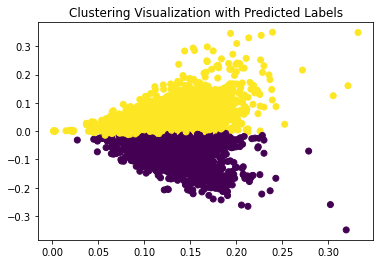

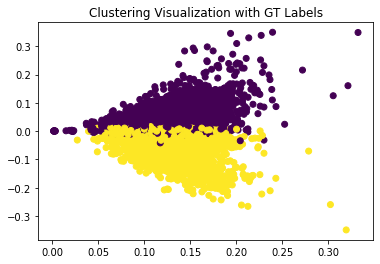

In [ ]:
import matplotlib.pyplot as plt

reduced = TruncatedSVD(n_components=2).fit_transform(vectorized_train)
kmeans = KMeans(n_clusters=2, random_state=0, max_iter=1000, n_init=30).fit(reduced)
preds = kmeans.labels_
gt_labels = [0 if x < 4 else 1 for x in raw_train.target]

plt.scatter(reduced[...,0], reduced[...,1], c=preds)
plt.title("Clustering Visualization with Predicted Labels")
plt.figure()
plt.scatter(reduced[...,0], reduced[...,1], c=gt_labels)
plt.title("Clustering Visualization with GT Labels")

## NMF

/usr/local/lib/python3.8/dist-packages/sklearn/decomposition/_nmf.py:289: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(


Text(0.5, 1.0, 'Clustering Visualization with GT Labels')

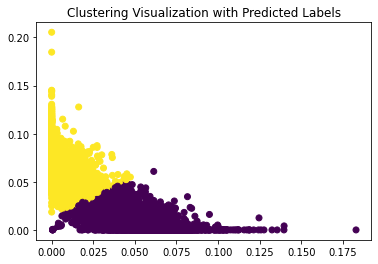

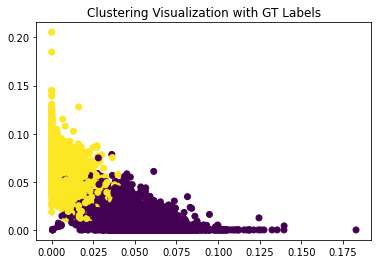

In [ ]:
from sklearn.decomposition import NMF

reduced = NMF(n_components=2).fit_transform(vectorized_train)
kmeans = KMeans(n_clusters=2, random_state=0, max_iter=1000, n_init=30).fit(reduced)
preds = kmeans.labels_
gt_labels = [0 if x < 4 else 1 for x in raw_train.target]

plt.scatter(reduced[...,0], reduced[...,1], c=preds)
plt.title("Clustering Visualization with Predicted Labels")
plt.figure()
plt.scatter(reduced[...,0], reduced[...,1], c=gt_labels)
plt.title("Clustering Visualization with GT Labels")

# Question 10

In [15]:
raw_train = fetch_20newsgroups(subset='train')
raw_test = fetch_20newsgroups(subset='test')

vectorizer = TfidfVectorizer(min_df=3)
vectorized_train = vectorizer.fit_transform(raw_train.data)
vectorized_test = vectorizer.transform(raw_test.data)
print(vectorized_train.shape)
print(vectorized_test.shape)

(11314, 38869)
(7532, 38869)


## SVD

In [ ]:
reduced = TruncatedSVD(n_components=450).fit_transform(vectorized_train)
kmeans = KMeans(n_clusters=20, random_state=0, max_iter=1000, n_init=30).fit(reduced)
report(kmeans.labels_, raw_train.target)

Homogeneity: 0.2729498590374165
Completeness: 0.3477642766822429
V-Measure: 0.3058483924765592
Adjusted Rand Index: 0.09055558338694278
Adjusted Mutual Info: 0.30147312250354097


## NMF

In [ ]:
reduced = NMF(n_components=2).fit_transform(vectorized_train)
kmeans = KMeans(n_clusters=20, random_state=0, max_iter=1000, n_init=30).fit(reduced)
report(kmeans.labels_, raw_train.target)

/usr/local/lib/python3.8/dist-packages/sklearn/decomposition/_nmf.py:289: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(


Homogeneity: 0.10767185838357418
Completeness: 0.11166918619848065
V-Measure: 0.10963409812406343
Adjusted Rand Index: 0.03054369037362546
Adjusted Mutual Info: 0.10471911922838817


# Question 11

In [10]:
!pip install umap-learn
import umap.umap_ as umap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.2/88.2 KB 5.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 54.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for umap-learn: filename=umap_learn-0.5.3-py3-none-any.whl size=82829 sha256=075fa2f087a4ce1726db061acef3881e9fb796efdde17de703bad65585ce0724
  Stored in directory: /root/.cache/pip/wheels/a9/3a/67/06a8950e053725912e6a8c42c4a3a241410f6487b8402542ea
  Created wheel for pynndescent: filename=pynndescent-0.5.8-py3-none-any.whl size=55513 sha256=1bdca33f94d383a1b29c30693b293e666ba5ecf448569a90312767735aec68c5
  Stored in directory: /root/.cache/pip/wheels/1c/63/3a/29954bca1a27ba100ed8c27973a78cb71b43dc67aed62e80c3
Successfully built umap-learn pynndescent


In [ ]:
for metric in ['cosine', 'euclidean']:
  for k in [5, 20, 200]:
    reducer = umap.UMAP(metric=metric, n_components=k)
    reduced = reducer.fit_transform(vectorized_train)

    kmeans = KMeans(n_clusters=20, random_state=0, max_iter=1000, n_init=30).fit(reduced)

    print(f"Metric: {metric}, n_components: {k}")
    report(kmeans.labels_, raw_train.target)

Metric: cosine, n_components: 5
Homogeneity: 0.46883085169875666
Completeness: 0.4942447747636006
V-Measure: 0.48120249819059446
Adjusted Rand Index: 0.3285164861567082
Adjusted Mutual Info: 0.47830444027602464
Metric: cosine, n_components: 20
Homogeneity: 0.4662279806734997
Completeness: 0.5047077593066049
V-Measure: 0.48470536156509564
Adjusted Rand Index: 0.3230801113027049
Adjusted Mutual Info: 0.48176442055539903
Metric: cosine, n_components: 200
Homogeneity: 0.4585943767211414
Completeness: 0.5097022714966615
V-Measure: 0.48279955515819134
Adjusted Rand Index: 0.31294192339130467
Adjusted Mutual Info: 0.47983285852858665
Metric: euclidean, n_components: 5
Homogeneity: 0.4688755934699984
Completeness: 0.49605843837061536
V-Measure: 0.48208413634900527
Adjusted Rand Index: 0.3366150896227088
Adjusted Mutual Info: 0.4791844416607504
Metric: euclidean, n_components: 20
Homogeneity: 0.47090296263472714
Completeness: 0.5065154538532342
V-Measure: 0.48806043310868835
Adjusted Rand Index

# Question 14

## Ward Linkage

In [ ]:
from sklearn.cluster import AgglomerativeClustering
reducer = umap.UMAP(metric='euclidean', n_components=20)
reduced = reducer.fit_transform(vectorized_train)

agg_cluster = AgglomerativeClustering(n_clusters=20, linkage='ward').fit(reduced)
report(agg_cluster.labels_, raw_train.target)

Homogeneity: 0.46150896028709065
Completeness: 0.5000468416372913
V-Measure: 0.4800056273739136
Adjusted Rand Index: 0.327590280237668
Adjusted Mutual Info: 0.47705916016865996


## Single Linkage

In [ ]:
reducer = umap.UMAP(metric='euclidean', n_components=20)
reduced = reducer.fit_transform(vectorized_train)

agg_cluster = AgglomerativeClustering(n_clusters=20, linkage='single').fit(reduced)
report(agg_cluster.labels_, raw_train.target)

Homogeneity: 0.03253263728451028
Completeness: 0.3440206531444507
V-Measure: 0.059443905612292895
Adjusted Rand Index: 0.0013471571750463963
Adjusted Mutual Info: 0.050414400213111436


# Question 15

In [11]:
!pip install hdbscan

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.2/5.2 MB 71.4 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for hdbscan: filename=hdbscan-0.8.29-cp38-cp38-linux_x86_64.whl size=3773926 sha256=796d4fd0b0115bfc9ecb290bd4d9eaea2c67a8cac8dc38eb0f3962be734d8e82
  Stored in directory: /root/.cache/pip/wheels/76/06/48/527e038689c581cc9e519c73840efdc7473805149e55bd7ffd
Successfully built hdbscan


In [ ]:
from hdbscan import HDBSCAN

reducer = umap.UMAP(metric='euclidean', n_components=20)
reduced = reducer.fit_transform(vectorized_train)

for min_size in [20, 100, 200]:
  clusterer = HDBSCAN(min_cluster_size=min_size).fit(reduced)

  report(clusterer.labels_, raw_train.target)

Homogeneity: 0.39072299562709983
Completeness: 0.4219175019115476
V-Measure: 0.4057215232410749
Adjusted Rand Index: 0.07679506481282564
Adjusted Mutual Info: 0.39028729279942176
Homogeneity: 0.018316928867725693
Completeness: 0.3511555480694921
V-Measure: 0.03481770143646767
Adjusted Rand Index: 0.0009479589312843107
Adjusted Mutual Info: 0.03376091821360799
Homogeneity: 0.054707170745917647
Completeness: 0.2253331659027116
V-Measure: 0.08803974548298825
Adjusted Rand Index: 0.016857289499845243
Adjusted Mutual Info: 0.08720965088848541


# Question 17

In [13]:
!pip install umap-learn
!pip install hdbscan
import umap.umap_ as umap
from sklearn.decomposition import TruncatedSVD, NMF
from hdbscan import HDBSCAN
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn import metrics

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
num_dimensions = [5, 20, 200]
dim_red = [TruncatedSVD, NMF, umap.UMAP]
cluster_algs = [KMeans, AgglomerativeClustering, HDBSCAN]
labels = raw_train.target

def evaluate(model):
  preds = model.labels_
  res = []
  res.append(metrics.homogeneity_score(labels, preds))
  res.append(metrics.completeness_score(labels, preds))
  res.append(metrics.v_measure_score(labels, preds))
  res.append(metrics.adjusted_rand_score(labels, preds))
  res.append(metrics.adjusted_mutual_info_score(labels, preds))
  return sum(res) / len(res)

best_score = 0.0
best_model = None

for dim in num_dimensions:
  for dim_red_idx in range(3):
    # Initializes dimensionality reduction method
    if dim_red_idx == 3:
      reducer = dim_red[dim_red_idx](metric='cosine', n_components=dim)
    else:
      reducer = dim_red[dim_red_idx](n_components=dim)

    reduced = reducer.fit_transform(vectorized_train)
  
    # KMeans
    for k in [10, 20, 50]:
      clusterer = KMeans(n_clusters=k, random_state=0, max_iter=1000, n_init=30).fit(reduced)
      current_score = evaluate(clusterer)
      if current_score > best_score:
        best_score = current_score
        best_model = ('kmeans', k, dim_red_idx, dim)

    # Agglomerative
    clusterer = AgglomerativeClustering(n_clusters=20, linkage='single').fit(reduced)
    current_score = evaluate(clusterer)
    if current_score > best_score:
      best_score = current_score
      best_model = ('agglomerative', 20, dim_red_idx, dim)

    # HDBSCAN
    for min_size in [100, 200]:
      HDBSCAN(min_cluster_size=min_size).fit(reduced)
      current_score = evaluate(clusterer)
      if current_score > best_score:
        best_score = current_score
        best_model = ('hdbscan', min_size, dim_red_idx, dim)

print(best_model)

/usr/local/lib/python3.8/dist-packages/sklearn/decomposition/_nmf.py:289: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/decomposition/_nmf.py:289: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(


# Question 19

VGG can be a useful feature extractor even due to the domain gap between the training and validation datasets because the training dataset is large. It was likely trained on the ImageNet dataset which contains millions of images. Even though the classes are different than the flowers dataset, it likely learned to extract features for general images due to the large size of the training dataset.

# Question 20

The helper code performs feature extraction by using the Autoencoder to reconstruct the input dataset. The loss used to train the network is the reconstruction error (MSE) between the output and input images in a batch. Once the network is trained, the feature vectors are extracted from the narrowest part of the U-net architecture (eg. the output of the encoder).

# Question 21

All images in the dataset have a resolution of 224x224. The feature vectors are of dimension 4096

# Question 22

In [2]:
import torch
import torch.nn as nn
from torchvision import transforms, datasets
from torch.utils.data import DataLoader, TensorDataset
import numpy as np
import matplotlib.pyplot as plt

from tqdm import tqdm
import requests
import os
import tarfile

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix, adjusted_rand_score, adjusted_mutual_info_score
from sklearn.pipeline import Pipeline
from sklearn.base import TransformerMixin

In [3]:
filename = './flowers_features_and_labels.npz'

if os.path.exists(filename):
    file = np.load(filename)
    f_all, y_all = file['f_all'], file['y_all']

else:
    if not os.path.exists('./flower_photos'):
        # download the flowers dataset and extract its images
        url = 'http://download.tensorflow.org/example_images/flower_photos.tgz'
        with open('./flower_photos.tgz', 'wb') as file:
            file.write(requests.get(url).content)
        with tarfile.open('./flower_photos.tgz') as file:
            file.extractall('./')
        os.remove('./flower_photos.tgz')

    class FeatureExtractor(nn.Module):
        def __init__(self):
            super().__init__()

            vgg = torch.hub.load('pytorch/vision:v0.10.0', 'vgg16', pretrained=True)

            # Extract VGG-16 Feature Layers
            self.features = list(vgg.features)
            self.features = nn.Sequential(*self.features)
            # Extract VGG-16 Average Pooling Layer
            self.pooling = vgg.avgpool
            # Convert the image into one-dimensional vector
            self.flatten = nn.Flatten()
            # Extract the first part of fully-connected layer from VGG16
            self.fc = vgg.classifier[0]

        def forward(self, x):
            # It will take the input 'x' until it returns the feature vector called 'out'
            out = self.features(x)
            out = self.pooling(out)
            out = self.flatten(out)
            out = self.fc(out) 
            return out 

    # Initialize the model
    assert torch.cuda.is_available()
    feature_extractor = FeatureExtractor().cuda().eval()

    dataset = datasets.ImageFolder(root='./flower_photos',
                                   transform=transforms.Compose([transforms.Resize(224),
                                                                 transforms.CenterCrop(224),
                                                                 transforms.ToTensor(),
                                                                 transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])]))
    dataloader = DataLoader(dataset, batch_size=64, shuffle=True)

    # Extract features and store them on disk
    f_all, y_all = np.zeros((0, 4096)), np.zeros((0,))
    for x, y in tqdm(dataloader):
        with torch.no_grad():
            f_all = np.vstack([f_all, feature_extractor(x.cuda()).cpu()])
            y_all = np.concatenate([y_all, y])
    np.savez(filename, f_all=f_all, y_all=y_all)

In [4]:
print(f_all.shape, y_all.shape)
num_features = f_all.shape[1]

(3670, 4096) (3670,)


In [5]:
class Autoencoder(torch.nn.Module, TransformerMixin):
    def __init__(self, n_components):
        super().__init__()
        self.n_components = n_components
        self.n_features = None  # to be determined with data
        self.encoder = None
        self.decoder = None
        
    def _create_encoder(self):
        return nn.Sequential(
            nn.Linear(4096, 1280),
            nn.ReLU(True),
            nn.Linear(1280, 640),
            nn.ReLU(True), nn.Linear(640, 120), nn.ReLU(True), nn.Linear(120, self.n_components))
    
    def _create_decoder(self):
        return nn.Sequential(
            nn.Linear(self.n_components, 120),
            nn.ReLU(True),
            nn.Linear(120, 640),
            nn.ReLU(True),
            nn.Linear(640, 1280),
            nn.ReLU(True), nn.Linear(1280, 4096))
    
    def forward(self, X):
        encoded = self.encoder(X)
        decoded = self.decoder(encoded)
        return decoded
    
    def fit(self, X):
        X = torch.tensor(X, dtype=torch.float32, device='cuda')
        self.n_features = X.shape[1]
        self.encoder = self._create_encoder()
        self.decoder = self._create_decoder()
        self.cuda()
        self.train()
        
        criterion = nn.MSELoss()
        optimizer = torch.optim.Adam(self.parameters(), lr=1e-3, weight_decay=1e-5)

        dataset = TensorDataset(X)
        dataloader = DataLoader(dataset, batch_size=128, shuffle=True)

        for epoch in tqdm(range(100)):
            for (X_,) in dataloader:
                X_ = X_.cuda()
                # ===================forward=====================
                output = self(X_)
                loss = criterion(output, X_)
                # ===================backward====================
                optimizer.zero_grad()
                loss.backward()
                optimizer.step()

        return self     
        
    def transform(self, X):
        X = torch.tensor(X, dtype=torch.float32, device='cuda')
        self.eval()
        with torch.no_grad():
            return self.encoder(X).cpu().numpy()

100%|██████████| 100/100 [00:25<00:00,  3.88it/s]


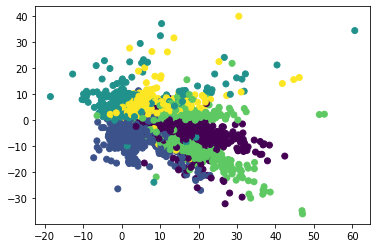

In [6]:
X_em =Autoencoder(2).fit_transform(f_all)
plt.scatter(*X_em.T, c=y_all)

In [7]:
print(vectorized_train.shape)
print(f_all.shape)

# print(np.sum(vectorized_train == 0.0) / (11314*38869))
print(np.sum(f_all <= 1e-5) / (3670*4096))

NameError: ignored

About 71% of values are close to zero, so the features are sparse.

# Question 24

## No Dim Red

In [15]:
from sklearn.cluster import AgglomerativeClustering
from hdbscan import HDBSCAN

# kmeans
print("K means")
kmeans = KMeans(n_clusters=5, random_state=0, max_iter=1000, n_init=30).fit(f_all)
report(kmeans.labels_, y_all)

# Agglomerative
print("Agglomerative Clustering")
agg_cluster = AgglomerativeClustering(n_clusters=5, linkage='ward').fit(f_all)
report(agg_cluster.labels_, y_all)

# HDBSCAN
print("HDBSCAN")
clusterer = HDBSCAN(min_cluster_size=20).fit(f_all)
report(clusterer.labels_, y_all)

K means
Homogeneity: 0.3262550013901229
Completeness: 0.3606249674678259
V-Measure: 0.3425800855953059
Adjusted Rand Index: 0.19330907774727044
Adjusted Mutual Info: 0.34163621996164206
Agglomerative Clustering
Homogeneity: 0.35742372729628397
Completeness: 0.4140254665890646
V-Measure: 0.3836481433561248
Adjusted Rand Index: 0.18855278251971858
Adjusted Mutual Info: 0.38274333888130235
HDBSCAN
Homogeneity: 2.0815080777064365e-16
Completeness: 1.0
V-Measure: 4.163016155412872e-16
Adjusted Rand Index: 0.0
Adjusted Mutual Info: 2.8509665587477824e-17


## SVD

In [16]:
from sklearn.decomposition import TruncatedSVD

reduced = TruncatedSVD(n_components=50).fit_transform(f_all)

# kmeans
print("K means")
kmeans = KMeans(n_clusters=5, random_state=0, max_iter=1000, n_init=30).fit(reduced)
report(kmeans.labels_, y_all)

# Agglomerative
print("Agglomerative Clustering")
agg_cluster = AgglomerativeClustering(n_clusters=5, linkage='ward').fit(reduced)
report(agg_cluster.labels_, y_all)

# HDBSCAN
print("HDBSCAN")
clusterer = HDBSCAN(min_cluster_size=20).fit(reduced)
report(clusterer.labels_, y_all)

K means
Homogeneity: 0.3349315083374776
Completeness: 0.3709906406132308
V-Measure: 0.3520401081744576
Adjusted Rand Index: 0.19531488433656477
Adjusted Mutual Info: 0.3511088884243087
Agglomerative Clustering
Homogeneity: 0.3442196758272489
Completeness: 0.38750509964880986
V-Measure: 0.3645821058764556
Adjusted Rand Index: 0.19796721672976686
Adjusted Mutual Info: 0.36366170638675444
HDBSCAN
Homogeneity: 2.0815080777064365e-16
Completeness: 1.0
V-Measure: 4.163016155412872e-16
Adjusted Rand Index: 0.0
Adjusted Mutual Info: 2.8509665587477824e-17


## UMAP

In [17]:
reducer = umap.UMAP(metric='cosine', n_components=50)
reduced = reducer.fit_transform(f_all)

# kmeans
print("K means")
kmeans = KMeans(n_clusters=5, random_state=0, max_iter=1000, n_init=30).fit(reduced)
report(kmeans.labels_, y_all)

# Agglomerative
print("Agglomerative Clustering")
agg_cluster = AgglomerativeClustering(n_clusters=5, linkage='ward').fit(reduced)
report(agg_cluster.labels_, y_all)

# HDBSCAN
print("HDBSCAN")
clusterer = HDBSCAN(min_cluster_size=20).fit(reduced)
report(clusterer.labels_, y_all)

K means
Homogeneity: 0.5308986006657167
Completeness: 0.5419800522340906
V-Measure: 0.5363820979047507
Adjusted Rand Index: 0.46563953158676114
Adjusted Mutual Info: 0.535741958322035
Agglomerative Clustering
Homogeneity: 0.539093140344544
Completeness: 0.565051034259979
V-Measure: 0.5517669585554806
Adjusted Rand Index: 0.48975286822925745
Adjusted Mutual Info: 0.5511398358215023
HDBSCAN
Homogeneity: 0.179315177782789
Completeness: 0.6353789732056442
V-Measure: 0.27969537623802976
Adjusted Rand Index: 0.09494009559863244
Adjusted Mutual Info: 0.2793118679420099


## Autoencoder

In [18]:
reduced = Autoencoder(50).fit_transform(f_all)

# kmeans
print("K means")
kmeans = KMeans(n_clusters=5, random_state=0, max_iter=1000, n_init=30).fit(reduced)
report(kmeans.labels_, y_all)

# Agglomerative
print("Agglomerative Clustering")
agg_cluster = AgglomerativeClustering(n_clusters=5, linkage='ward').fit(reduced)
report(agg_cluster.labels_, y_all)

# HDBSCAN
print("HDBSCAN")
clusterer = HDBSCAN(min_cluster_size=20).fit(reduced)
report(clusterer.labels_, y_all)

100%|██████████| 100/100 [00:23<00:00,  4.34it/s]


K means
Homogeneity: 0.29932907975113093
Completeness: 0.317099128556562
V-Measure: 0.3079579716226842
Adjusted Rand Index: 0.23849210553030098
Adjusted Mutual Info: 0.30698461542264344
Agglomerative Clustering
Homogeneity: 0.344426659306424
Completeness: 0.3596660177946927
V-Measure: 0.3518814184663941
Adjusted Rand Index: 0.28705957005657895
Adjusted Mutual Info: 0.35097620672458296
HDBSCAN
Homogeneity: 2.0815080777064365e-16
Completeness: 1.0
V-Measure: 4.163016155412872e-16
Adjusted Rand Index: 0.0
Adjusted Mutual Info: 2.8509665587477824e-17


# Question 25

In [19]:
class MLP(torch.nn.Module):
    def __init__(self, num_features):
        super().__init__()
        self.model = nn.Sequential(
            nn.Linear(num_features, 1280),
            nn.ReLU(True),
            nn.Linear(1280, 640),
            nn.ReLU(True), 
            nn.Linear(640, 5),
            nn.LogSoftmax(dim=1)
        )
        self.cuda()
    
    
    def forward(self, X):
        return self.model(X)
    
    def train(self, X, y):
        X = torch.tensor(X, dtype=torch.float32, device='cuda')
        y = torch.tensor(y, dtype=torch.int64, device='cuda')

        self.model.train()
        
        criterion = nn.NLLLoss()
        optimizer = torch.optim.Adam(self.parameters(), lr=1e-3, weight_decay=1e-5)

        dataset = TensorDataset(X, y)
        dataloader = DataLoader(dataset, batch_size=128, shuffle=True)

        for epoch in tqdm(range(100)):
            for (X_, y_) in dataloader:
                preds = self.model(X_)
                loss = criterion(preds, y_)
                optimizer.zero_grad()
                loss.backward()
                optimizer.step()
        return self
    
    def eval(self, X_test, y_test):
        X = torch.tensor(X_test, dtype=torch.float32, device='cuda')
        y = torch.tensor(y_test, dtype=torch.int64, device='cuda')

        self.model.eval()
        with torch.no_grad():
          test_preds = torch.argmax(self.model(X), dim=1)
        return torch.sum(test_preds == y) / test_preds.shape[0]

In [20]:
print(f_all.shape, y_all.shape)

(3670, 4096) (3670,)


## No dim red

In [21]:
from sklearn.model_selection import train_test_split

f_train, f_test, y_train, y_test = train_test_split(f_all, y_all, test_size=0.20, random_state=0)
print(f_train.shape, f_test.shape, y_train.shape, y_test.shape)

mlp = MLP(4096).train(f_train, y_train)
print(mlp.eval(f_test, y_test))

(2936, 4096) (734, 4096) (2936,) (734,)


100%|██████████| 100/100 [00:08<00:00, 11.37it/s]


tensor(0.8828, device='cuda:0')


## SVD

In [23]:
from sklearn.decomposition import TruncatedSVD

reduced = TruncatedSVD(n_components=50).fit_transform(f_all)

f_train, f_test, y_train, y_test = train_test_split(reduced, y_all, test_size=0.20, random_state=0)
print(f_train.shape, f_test.shape, y_train.shape, y_test.shape)

mlp = MLP(50).train(f_train, y_train)
print(mlp.eval(f_test, y_test))

(2936, 50) (734, 50) (2936,) (734,)


100%|██████████| 100/100 [00:14<00:00,  6.72it/s]


tensor(0.8910, device='cuda:0')


## UMAP

In [24]:
reducer = umap.UMAP(metric='cosine', n_components=50)
reduced = reducer.fit_transform(f_all)

f_train, f_test, y_train, y_test = train_test_split(reduced, y_all, test_size=0.20, random_state=0)
print(f_train.shape, f_test.shape, y_train.shape, y_test.shape)

mlp = MLP(50).train(f_train, y_train)
print(mlp.eval(f_test, y_test))

(2936, 50) (734, 50) (2936,) (734,)


100%|██████████| 100/100 [00:06<00:00, 14.78it/s]

tensor(0.7943, device='cuda:0')


## Autoencoder

In [25]:
reduced = Autoencoder(50).fit_transform(f_all)

f_train, f_test, y_train, y_test = train_test_split(reduced, y_all, test_size=0.20, random_state=0)
print(f_train.shape, f_test.shape, y_train.shape, y_test.shape)

mlp = MLP(50).train(f_train, y_train)
print(mlp.eval(f_test, y_test))

100%|██████████| 100/100 [00:23<00:00,  4.29it/s]


(2936, 50) (734, 50) (2936,) (734,)


100%|██████████| 100/100 [00:06<00:00, 14.91it/s]

tensor(0.8651, device='cuda:0')
